# Introduction

In this Notebook I study along Aurelien Gerons Book Handon-ml-2

In [1]:
#get the data and split into train test and labels

from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
#just to reset the train, test and labels without reloading
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

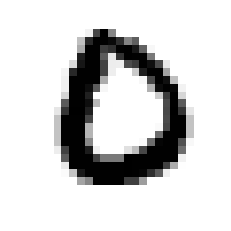

In [2]:
#show one random digit
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint

index=randint(0,70000)

some_digit = X[index]

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

plot_digit(some_digit)

# Binary Classification

classify a thing based on two classes

In [ ]:
#Create labels
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
#train a stochastic gradient descend classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_5)

In [3]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

NameError: name 'sgd_clf' is not defined

In the book they discuss PR and ROC and choose a RandomForestClassifier because it outperfroms the SGD.

So what are those metrics:

PR: Precision and Recall Precision is how many true positives you find and Recall is how many false negatives you find. Using SGD you have to find the right threshold to decide which you prefer Precision or Recall. For example you need high precision when choosing child-friendly videos but high recall when detecting shoplifters.

ROC: Plots True Positive Rate against False Positive Rate.

# Multiclass classification

classifiy things based on multiple classes it can belong to

In [ ]:
#Training some models, They take so long...
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

svm_clf = SVC(gamma="auto")
#print("svc classifier",cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy",verbose=10))

ovr_clf = OneVsRestClassifier(SVC(gamma="auto"))
#ovr_clf_scores=cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy",verbose=10,n_jobs=4)
#print("One vs rest svc classifier",ovr_clf_scores.mean())

sgd_clf_multi = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf_multi_scores =cross_val_score(sgd_clf_multi, X_train, y_train, cv=3, scoring="accuracy", verbose=10, n_jobs=8)
print("sgd classifier",sgd_clf_multi_scores)

# Multilabel classification
You can classify the things using mulitple labels. For example whether a number is big (>5) and odd (%2=0)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [5]:
knn_clf.predict([some_digit])

array([[False, False]])

# Multioutput classification
As I understand this the upper one can classify something on multiple binary classes but this one can classify stuff on many non binary classes

In [ ]:
#we pollute the images with noise
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

#shows a represantation of it
some_index = randint(0,10000)
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

# End of chapter; Time for exercises

## Build a classifier that achieves over 97% accuracy

In [6]:
#Find a model
#he hints that the kneighborsclassifier works best so I will go with it

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Gridsearch the best model
from sklearn.model_selection import GridSearchCV

params={'weights':['uniform','distance'],'n_neighbors':[2,4,6]}

gridsearch = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring="accuracy", cv=3, verbose=10, n_jobs=2)
gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
print(gridsearch.best_params_)
print(gridsearch.best_estimator_)

In [7]:
from sklearn.metrics import accuracy_score

#evaluate 
pred_test=knn_clf.predict(X_test)
print(accuracy_score(y_test,pred_test))

KeyboardInterrupt: 